In [1]:
fname = '/Users/klay6683/Dropbox/DDocuments/planet4/hireport_south_mars_zoo_v6.xls'

#South Year 1

In [2]:
df = pd.read_excel(fname, sheet='South_year_1')

In [4]:
# df.dropna(how='all', inplace=True)

In [5]:
#df.time = pd.to_datetime(df.time)

In [6]:
df.head()

,Observation_id,lat¬∞,lon¬∞,Ls¬∞,time,Comment,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PSP_001920_1110,-68.971,241.784,155.212,2006-Dec-24-358T01:01:34,8523 Observe seasonal defrosting,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dtypes

Observation_id     object
lat¬∞             float64
lon¬∞             float64
Ls¬∞              float64
time               object
Comment            object
Unnamed: 6         object
Unnamed: 7         object
dtype: object

In [36]:
def repair_time(tstr):
    if type(tstr) == float:
        return tstr
    date, time = tstr.split('T')
    date_tokens = date.split('-')
    newdate = '-'.join(date_tokens[:3])
    return "{}T{}".format(newdate, time).split('.')[0]

status = pd.read_hdf('image_name_status.h5','df')
def fix_and_merge(df):
    df.time = df.time.map(repair_time)    
    df.columns = ['obs_id','Lat','Lon','Ls', 'time', 'Comment','Unnamed1','Unnamed2']
    oldindex = df.index
    merged = df.merge(status, left_on='obs_id', right_index=True).reindex(oldindex)
    merged = merged.drop(['Unnamed1','Unnamed2'], axis=1)
    return merged

In [9]:
df.time = df.time.map(repair_time)

In [10]:
try:
    df.time = pd.to_datetime(df.time, format='%Y-%b-%dT%H:%M:%S', errors='raise')
except ValueError as e:
    print(e)

In [11]:
df.head()

,Observation_id,lat¬∞,lon¬∞,Ls¬∞,time,Comment,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,PSP_001920_1110,-68.971,241.784,155.212,2006-12-24 01:01:34,8523 Observe seasonal defrosting,NaN,NaN
4,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [15]:
status.columns

Index(['status'], dtype='object')

In [26]:
merged.columns

Index(['obs_id', 'Lat', 'Lon', 'Ls', 'time', 'Comment', 'Unnamed1', 'Unnamed2', 'status'], dtype='object')

In [28]:
merged = merged.drop(

In [29]:
merged.to_excel('merged_with_status_excel_sheet.xlsx')

In [ ]:
# %load /Users/klay6683/Downloads/spstere.py
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# setup north polar stereographic basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge  
# of the map at lon_0. Default value of lat_ts
# (latitude of true scale) is pole.
m = Basemap(projection='spstere',boundinglat=-80,lon_0=90,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua') 
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
for y in np.linspace(19*m.ymin/20,m.ymin/20,10):
    for x in np.linspace(19*m.xmin/20,m.xmin/20,10):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,2.5,100,\
                        facecolor='green',zorder=10,alpha=0.5)
plt.title("South Polar Stereographic Projection")
plt.show()


In [68]:
%matplotlib inline

In [123]:
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

class PoleMapper(object):
    """docstring for PoleMapper"""

#     palette = mpl.cm.cubehelix
    
    def __init__(self, blat, gridpts=1000, round=True):
        super(PoleMapper, self).__init__()
        self.blat = blat
        self.gridpts = gridpts
        self.basemap = Basemap(lon_0=180, boundinglat=blat, 
                         projection='spstere', round=round)
        self.pole = 'Southpole' if blat < 0 else 'Northpole'
        
    def create_map(self, hdata, strings, ax=None, vmin=None, vmax=None):
        mode, chid, dayside = strings
        if not ax:
            fig, ax = plt.subplots()
        self.palette.set_bad(ax.get_axis_bgcolor(), 1.0)
        CS = self.basemap.pcolormesh(hdata.xedges, hdata.yedges, hdata.H.T,
                               shading='flat', cmap=self.palette,
                               ax = ax, vmin=vmin, vmax=vmax)
        self.basemap.drawparallels(np.arange(-90, self.blat),latmax=-90, ax=ax, 
                                    labels=[1,1,1,1])
        self.basemap.drawmeridians(np.arange(0,360,30),latmax=-90, ax=ax,
                                    labels=[1,1,1,1])
        self.basemap.colorbar(CS,ax=ax)
        ax.set_title(' '.join([self.pole, chid, mode, dayside]))
        plt.savefig('_'.join(['southpole', chid, mode, str(self.gridpts),
                              dayside]) + '.png', dpi=300)

    def create_scatter_map(self, lon, lat, ax=None):
        if ax is None:
            fig, ax = plt.subplots()
        CS = self.basemap.scatter(lon, lat, latlon=True)
        self.basemap.drawparallels(np.arange(-90, self.blat, 5), latmax=90, ax=ax)
        meridians = self.basemap.drawmeridians(np.arange(0, 360, 30), labelstyle='+/-', latmax=90, ax=ax,
                                   labels=[1, 1, 1, 1],
                                  )
        ax.set_title('Southpole of Mars')
        return meridians
    
    def create_multimap(self, data, strings):
        n = len(data)
        fig, ax = plt.subplots(1, n)
        for i,d in enumerate(data):
            self.create_map(d, strings[i], ax.flatten()[i])


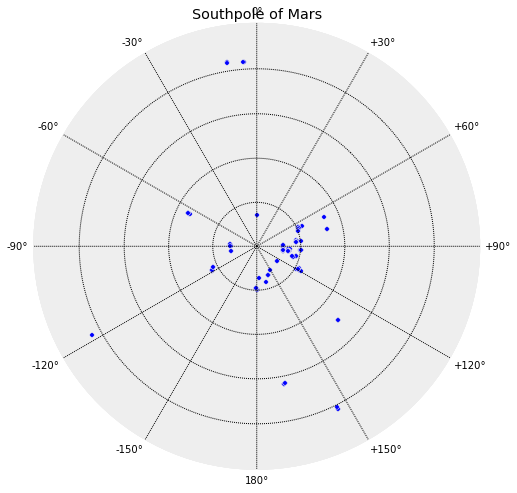

In [130]:
fig, ax = plt.subplots(figsize=(8,8))
pm = PoleMapper(-65, round=True)
meridians = pm.create_scatter_map(df.Lon.values, df.Lat.values, ax=ax)

In [158]:
for i in meridians.items():
    to = i[1][1][0]

In [161]:
print(to)

Text(-4.2772e+06,-5.3404e+06,'+30°')


In [120]:
df[df.Lat==df.Lat.max()]

,obs_id,Lat,Lon,Ls,Comment,Unnamed1,Unnamed2
time,,,,,,,
2006-12-24 01:01:34,PSP_001920_1110,-68.971,241.784,155.212,8523 Observe seasonal defrosting,NaN,NaN


# South year 2

In [74]:
fname = fname+'x'

In [75]:
fname

'/Users/klay6683/Dropbox/DDocuments/planet4/hireport_south_mars_zoo_v6.xlsx'

In [82]:
excelfile = pd.ExcelFile(fname)

In [84]:
df = excelfile.parse(1)

In [85]:
df.head()

,Observation_id,lat¬∞,lon¬∞,Ls¬∞,time,Comment,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESP_012254_1065,-73.474,339.506,223.223,2009-Mar-08-67T07:51:45,32792 OMEGA observes here transformation of CO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ESP_012887_1065,-73.474,339.506,254.349,2009-Apr-26-116T15:38:48,32794 Carbon dioxide transformation from snow ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ESP_011680_1055,-74.225,168.513,196.067,2009-Jan-22-22T14:25:53,4188 Caterpillar evolution Seasonal Processes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.time = df.time.map(repair_time)
df = df.loc[:, df.columns[:-7]]
oldindex = df.index
merged = df.merge(status, left_on='Observation_id', right_index=True).reindex(oldindex)
merged.head()

In [101]:
merged.to_excel('merged_season2.xlsx')

In [105]:
df = excelfile.parse(2)
df.head()

,Observation_id,lat¬∞,lon¬∞,Ls¬∞,Unnamed: 4,Comment,time,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESP_022699_0985,-81.378,295.759,302.400,NaN,60388 Inca City ice-free Seasonal Processes,2011-May-31-151T05:01:51,NaN,NaN,NaN
2,ESP_021460_0985,-81.381,295.753,242.304,NaN,56720 monitoring spring surface evolution of I...,2011-Feb-23-54T15:57:00,NaN,NaN,NaN
3,ESP_020959_0985,-81.378,295.757,217.836,NaN,55294 Observe early spring evolution in Inca C...,2011-Jan-15-15T14:59:28,NaN,NaN,NaN
4,ESP_020748_0985,-81.378,295.757,207.782,NaN,55298 Observe early spring evolution in Inca C...,2010-Dec-30-364T04:24:21,NaN,NaN,NaN


In [110]:
df = df.loc[:, df.columns[:7]]

In [107]:
df.head()

,Observation_id,lat¬∞,lon¬∞,Ls¬∞,Unnamed: 4,Comment,time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESP_022699_0985,-81.378,295.759,302.400,NaN,60388 Inca City ice-free Seasonal Processes,2011-May-31-151T05:01:51
2,ESP_021460_0985,-81.381,295.753,242.304,NaN,56720 monitoring spring surface evolution of I...,2011-Feb-23-54T15:57:00
3,ESP_020959_0985,-81.378,295.757,217.836,NaN,55294 Observe early spring evolution in Inca C...,2011-Jan-15-15T14:59:28
4,ESP_020748_0985,-81.378,295.757,207.782,NaN,55298 Observe early spring evolution in Inca C...,2010-Dec-30-364T04:24:21


In [111]:
df.time = df.time.map(repair_time)
oldindex = df.index
merged = df.merge(status, left_on='Observation_id', right_index=True).reindex(oldindex)
merged.head()

,Observation_id,lat¬∞,lon¬∞,Ls¬∞,Unnamed: 4,Comment,time,status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESP_022699_0985,-81.378,295.759,302.400,NaN,60388 Inca City ice-free Seasonal Processes,2011-May-31T05:01:51,280.2
2,ESP_021460_0985,-81.381,295.753,242.304,NaN,56720 monitoring spring surface evolution of I...,2011-Feb-23T15:57:00,291.5
3,ESP_020959_0985,-81.378,295.757,217.836,NaN,55294 Observe early spring evolution in Inca C...,2011-Jan-15T14:59:28,284.0
4,ESP_020748_0985,-81.378,295.757,207.782,NaN,55298 Observe early spring evolution in Inca C...,2010-Dec-30T04:24:21,284.7


In [112]:
merged.to_excel('merged_season3.xlsx')

In [113]:
df = excelfile.parse(3)
df.head()

,observation_id,roll¬∞,Status,stereo,Stability,lat¬∞,lon¬∞,Ls¬∞,Unnamed: 8,Comment,time,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ESP_030084_0985,-4.586,COMPLETE,NO,HIGH,-81.361,295.818,232.856,NaN,8925 Inca City monitoring Polar Geology,2012-Dec-26-361T15:29:16,NaN,NaN
4,ESP_030229_0985,-2.454,COMPLETE,NO,HIGH,-81.451,295.798,239.987,NaN,77038 Inca City Seasonal Processes,2013-Jan-06-6T22:41:10,NaN,NaN


In [114]:
df = df.loc[:, df.columns[:-2]]
df.head()

,observation_id,roll¬∞,Status,stereo,Stability,lat¬∞,lon¬∞,Ls¬∞,Unnamed: 8,Comment,time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ESP_030084_0985,-4.586,COMPLETE,NO,HIGH,-81.361,295.818,232.856,NaN,8925 Inca City monitoring Polar Geology,2012-Dec-26-361T15:29:16
4,ESP_030229_0985,-2.454,COMPLETE,NO,HIGH,-81.451,295.798,239.987,NaN,77038 Inca City Seasonal Processes,2013-Jan-06-6T22:41:10


In [116]:
df.time = df.time.map(repair_time)
oldindex = df.index
merged = df.merge(status, left_on='observation_id', right_index=True).reindex(oldindex)
merged.head()

,observation_id,roll¬∞,Status,stereo,Stability,lat¬∞,lon¬∞,Ls¬∞,Unnamed: 8,Comment,time,status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ESP_030084_0985,-4.586,COMPLETE,NO,HIGH,-81.361,295.818,232.856,NaN,8925 Inca City monitoring Polar Geology,2012-Dec-26T15:29:16,100.3
4,ESP_030229_0985,-2.454,COMPLETE,NO,HIGH,-81.451,295.798,239.987,NaN,77038 Inca City Seasonal Processes,2013-Jan-06T22:41:10,100.1


In [117]:
merged.to_excel('merged_season4.xlsx')